# Back to Z mass fitting
Kak W., 2018-09-23

## Recap:

 - Parametrize and fit shape of Z mass distribution vs. other backgrounds
 - two templates shapes to be used in fitting data to measure Z peak-to-tail ratio
 - i.e. transfer factor between the mass peak control region vs signal region with inverse cut

## Import Samples

- path: `/data/users/kakw/Resonances/LepGamma_elg_newblind_2018_09_23_beta`
- apply blinding to strict signal region: 
    - MET>25 and
    - leading photon passing:
        - Pixel Veto, and
        - CSEV

### Sample Pre-selection
- Trigger: HLT_Ele27_eta2p1_WPTight_Gsf
- Overlap removal with dR<0.4, in the preference of muon over electron over photon over jets
- at least 1 photon object and only 1 electron object required
- no muons in sample
- cut-based working points
- photon: medium, pT>20  
- electron: medium, pT>10 (will move to tight)
- muon: tight, pT> 25

### Signal region cuts (e channel)

 - photon pT > 50
 - inverse Z mass cut (Width?)
 - photon passing electron veto (Pixel Seed?)
 

In [1]:
cd /home/kakw/efake/WG_Analysis/Plotting

/home/kakw/efake/WG_Analysis/Plotting


In [2]:
 %run interactiveStackTree.py --baseDir  /data/users/kakw/Resonances/LepGamma_elg_newblind_2018_09_23_beta \
--samplesConf Modules/Resonance.py --xsFile cross_sections/photon15.py \
--lumi 35900. --treeName UMDNTuple/EventTree --fileName tree.root --jupyt --quiet
 # /data/users/jkunkle/Resonances/LepGamma_elg_2018_03_28/

Welcome to JupyROOT 6.10/05
-------------------------------------
 LOAD CROSS SECTION INFO
-------------------------------------
DYJetsToLL_M-50                xsec : 5.77e+03 pb Nevent : 49144274 lumi : 8.52e+03 scale :     4.21
ZGTo2LG                        xsec :      118 pb Nevent : 9321494  lumi : 7.91e+04 scale :    0.454
TTJets_DiLept                  xsec :     85.7 pb Nevent : 6094476  lumi : 7.11e+04 scale :    0.505
TTJets_SingleLeptFromT         xsec :      179 pb Nevent : 11957043 lumi : 6.69e+04 scale :    0.537
TTJets_SingleLeptFromTbar      xsec :      179 pb Nevent : 46455353 lumi :  2.6e+05 scale :    0.138
TTGJets                        xsec :      3.7 pb Nevent : 1577833  lumi : 4.27e+05 scale :   0.0841
WWTo2L2Nu                      xsec :     12.2 pb Nevent : 1        lumi :   0.0821 scale : 4.37e+05
WGToLNuG-amcatnloFXFX          xsec :      822 pb Nevent : 3235156  lumi : 3.94e+03 scale :     9.12
WGToLNuG-madgraphMLM           xsec :      405 pb Nevent : 6103

In [3]:
base = 'ph_n>=1 && el_n==1'
baseeta = base + ' && abs(ph_eta[0])<1.4'
base1 = 'ph_n==1 && el_n==1'
base1eta = base1 + ' && ph_IsEB[0]'
a4 = '&& ph_hasPixSeed[0]==0'  #Pixel seed
b4 = '&& ph_hasPixSeed[0]==1'
ltmet = '&&met_pt<25'
gtmet = '&&met_pt>25'
phpt50 = "&&ph_pt[0]>50"
unblind = "ph_hasPixSeed[0]==1 || met_pt<25"
weight = "PUWeight*NLOWeight"

In [4]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptFit(1)
#samples.change_stack_order("GammaGamma","Wjets") # not working :/

## Fill histogram

### e,g mass with barrel photons
- Redid with new blinded samples and with weights applied

m_lep_ph : ph_n==1 && el_n==1 && ph_IsEB[0]&&met_pt<25&&ph_pt[0]>50
Make SingleElectron hist m_lep_ph :  ((ph_n==1 && el_n==1 && ph_IsEB[0]&&met_pt<25&&ph_pt[0]>50)&&(ph_hasPixSeed[0]==1 || met_pt<25))*PUWeight*NLOWeight


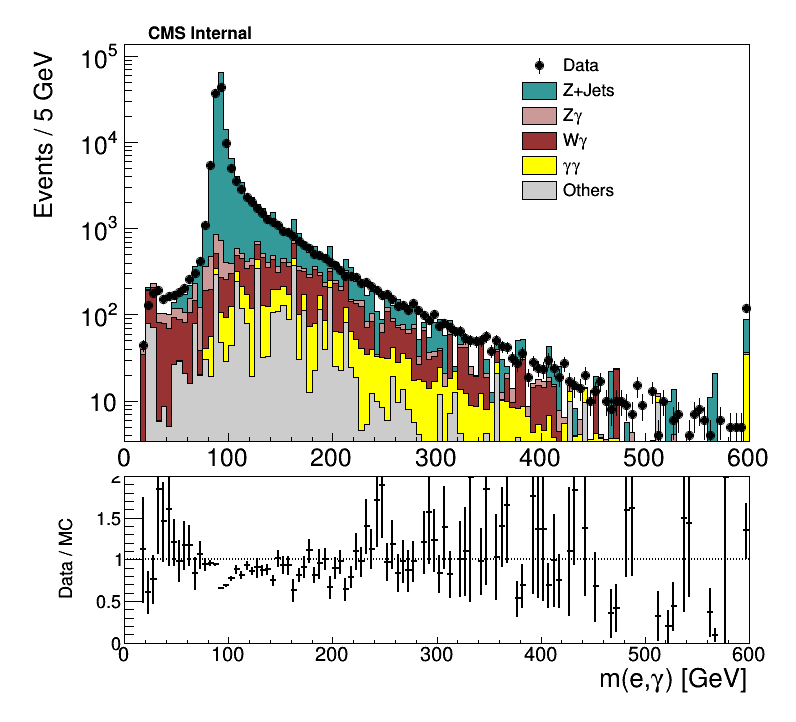

Info in <TCanvas::Print>: png file /tmp/tmpmmgCbs.png has been created


In [5]:
samples.Draw("m_lep_ph",base1eta+ltmet+phpt50,(120,0,600),
             {"xlabel":"m(e,#gamma) ","ymin":10,"logy":1,"unblind": unblind, "weight": weight , "doratio":1})

m_lep_ph : ph_n==1 && el_n==1 && ph_IsEB[0]&&met_pt<25&&ph_pt[0]>50
Make SingleElectron hist m_lep_ph :  ((ph_n==1 && el_n==1 && ph_IsEB[0]&&met_pt<25&&ph_pt[0]>50)&&(ph_hasPixSeed[0]==1 || met_pt<25))*PUWeight*NLOWeight


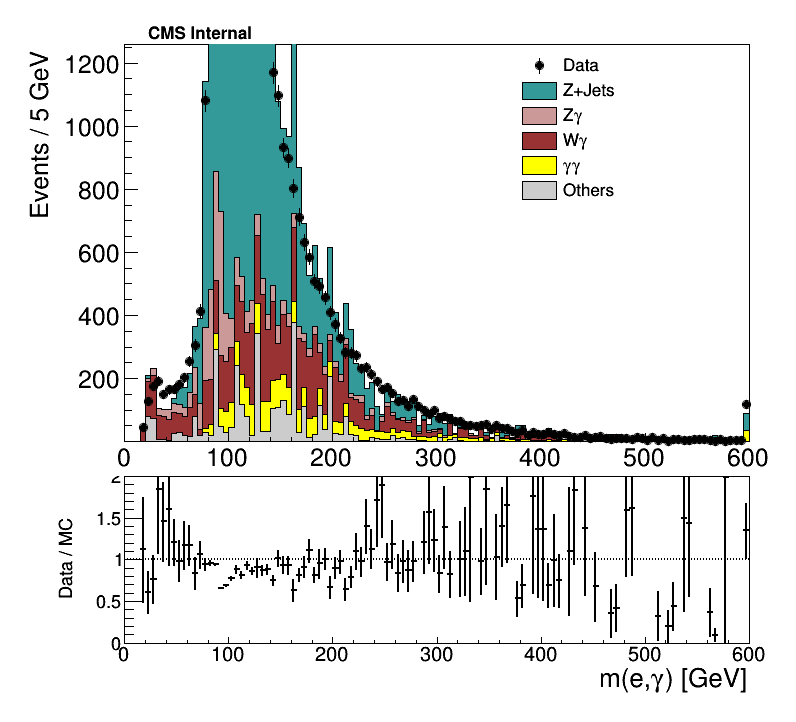

Info in <TCanvas::Print>: png file /tmp/tmpudZNqU.png has been created


In [6]:
samples.Draw("m_lep_ph",base1eta+ltmet+phpt50,(120,0,600),
             {"xlabel":"m(e,#gamma) ",'ymax':1000,"unblind": unblind, "weight": weight , "doratio":1})

In [7]:
samples.print_stack_count()

         Z+jets  1.5e+05 +/-   826
         Wgamma 7.03e+03 +/-   337
         Others 3.46e+03 +/-   499
         Zgamma 3.16e+03 +/-  51.1
     GammaGamma 2.54e+03 +/-  27.5
          ratio      173 +/-  15.7
          TOTAL 1.66e+05 +/- 1.02e+03


In [8]:
h1 = samples.get_stack_aggregate()
h1.Draw("hist")
samples.curr_canvases["top"]

<ROOT.TPad object ("toppad") at 0x9fb6b10>

In [9]:
f1 = ROOT.TF1("f1","gaus(0)",0,600)
f1.SetParameter(0,1e4)
f1.SetParameter(1,70)
f1.SetParameter(2,10)

In [10]:
h1.Fit("f1","s","",30,250);h1.GetXaxis().SetRangeUser(0,250); f1.Draw('same'); samples.curr_canvases["top"]

<ROOT.TPad object ("toppad") at 0x9fb6b10>

 FCN=5278.68 FROM MIGRAD    STATUS=CONVERGED     208 CALLS         209 TOTAL
                     EDM=2.86559e-09    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.0 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     6.47747e+04   5.57087e+02   1.25107e-01   2.26079e-07
   2  Mean         9.11128e+01   2.41066e-02   4.49351e-06   6.07423e-04
   3  Sigma        3.86561e+00   2.28293e-02  -8.71176e-07   5.60139e-02


In [11]:
samples.curr_canvases["top"].SetLogy(0);samples.curr_canvases["top"]

<ROOT.TPad object ("toppad") at 0x9fb6b10>

In [12]:
samples.deactivate_sample("Z+jets")
samples.deactivate_sample("Zgamma")

Deactivate sample Z+jets
Deactivate sample Zgamma


m_lep_ph : ph_n==1 && el_n==1 && ph_IsEB[0]&&met_pt<25&&ph_pt[0]>50
skipped  <Sample Data at 7feae4100dd0>


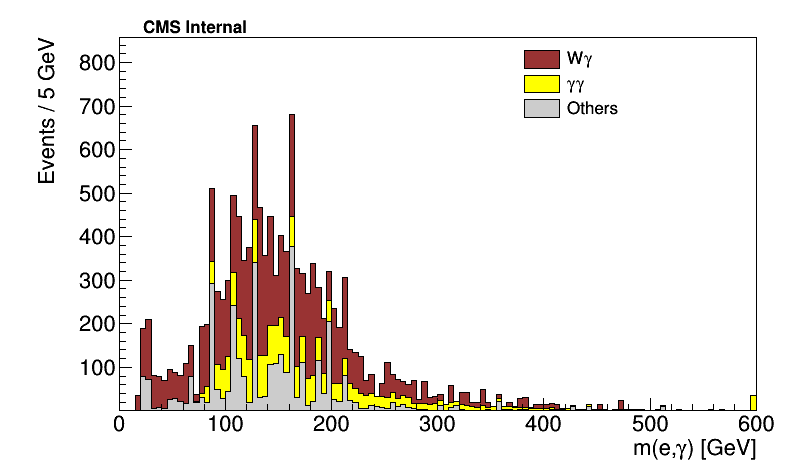

Info in <TCanvas::Print>: png file /tmp/tmpphVNdY.png has been created


In [13]:
samples.Draw("m_lep_ph",base1eta+ltmet+phpt50,(120,0,600),
             {"xlabel":"m(e,#gamma) ", "weight": weight}) 

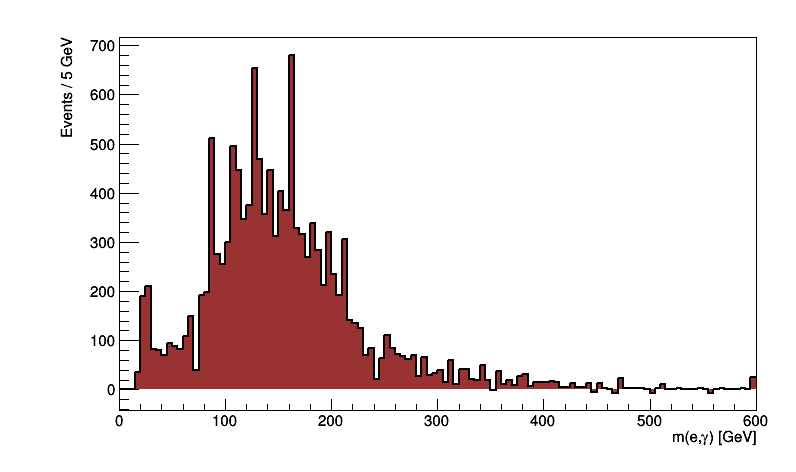

Info in <TCanvas::Print>: png file /tmp/tmprCgw8X.png has been created


In [14]:
h1 = samples.get_stack_aggregate()
h1.Draw('hist')
samples.curr_canvases["top"]

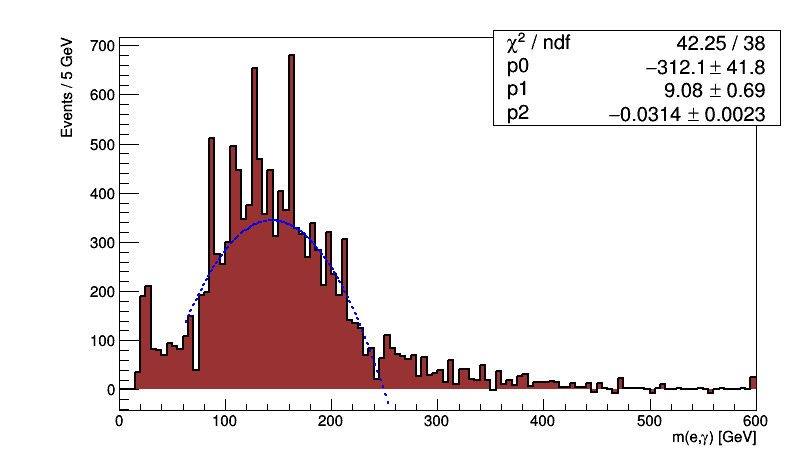


****************************************
Minimizer is Linear
Chi2                      =      42.2525
NDf                       =           38
p0                        =     -312.064   +/-   41.7901     
p1                        =      9.07968   +/-   0.692553    
p2                        =   -0.0313977   +/-   0.00230512  


Info in <TCanvas::Print>: png file /tmp/tmpgXW3QS.png has been created


In [15]:
f2a = ROOT.TF1("f2a","pol2",60,300)
param = array('d',[0,5,-.02])
f2a.SetParameters(param)

f2a.SetLineColor(4)
f2a.SetLineStyle(4)
h1.Fit("f2a","","",45,250)
f2a.Draw("same")
samples.curr_canvases["top"]

### Fitting non-Z MC shape with gaussian
 - fit is done around 45-300GeV of reconstructed mass

In [16]:
f2b = ROOT.TF1("f2b","gaus",60,600)
param = array('d',[600,160,30])
f2b.SetParameters(param)

f2b.SetLineColor(7)
f2b.SetLineStyle(5)
h1.Fit("f2b","","",45,300)
f2b.Draw("same")

 FCN=52.6082 FROM MIGRAD    STATUS=CONVERGED      75 CALLS          76 TOTAL
                     EDM=2.49446e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.76759e+02   2.03651e+01   5.03879e-02   3.57417e-05
   2  Mean         1.45590e+02   2.26628e+00   7.95469e-03   1.03010e-05
   3  Sigma        5.63352e+01   2.46949e+00   3.75161e-05   6.64626e-02


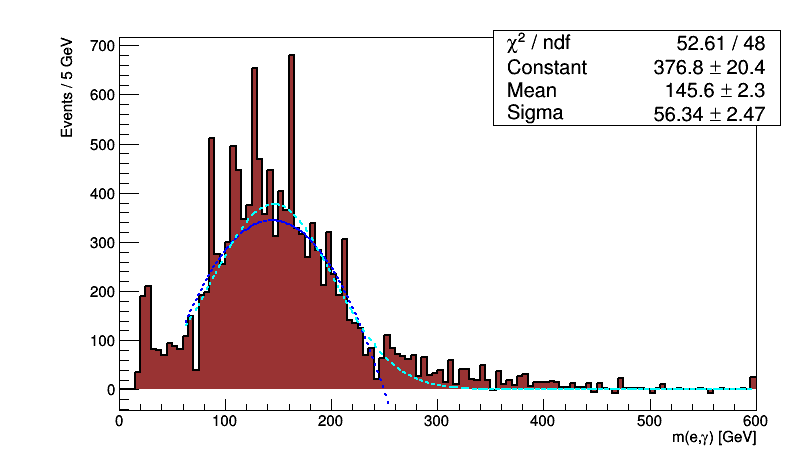

Info in <TCanvas::Print>: png file /tmp/tmp6gX7yt.png has been created


In [17]:
samples.curr_canvases["top"]

In [18]:
samples.deactivate_all_samples()
samples.activate_sample("Z+jets")
samples.activate_sample("Zgamma")

Activate sample Z+jets
Activate sample Zgamma


In [19]:
samples.Draw("m_lep_ph",base1eta+ltmet+phpt50,(120,0,600),
             {"xlabel":"m(e,#gamma) ","ymax":1000, "weight": weight}) ;

m_lep_ph : ph_n==1 && el_n==1 && ph_IsEB[0]&&met_pt<25&&ph_pt[0]>50


## How to parametrize Z peak?
- Red line is the best fit of the Z peak
- obviously we miss the tail , mostly on the right
- Crystal ball, but exponential in high end tail ?


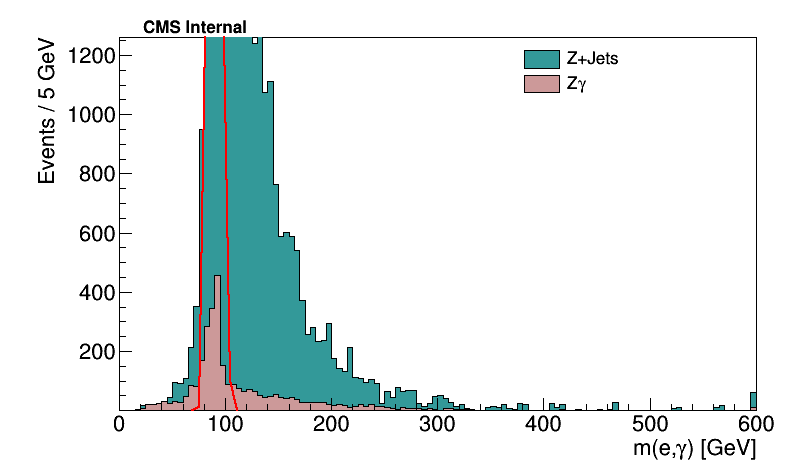

Info in <TCanvas::Print>: png file /tmp/tmpyfeRyP.png has been created


In [20]:
f1.Draw('same');samples.curr_canvases["top"]

## Conclusion

- 

documentation: http://hepcms-hn.umd.edu/~kakw/2018_09_23_zmass_fitter.html

#   

#   

#   

#   

# BACKUP

#   




|          |  MET<25   |MET>25, inv Z cut  |
|----------|-----------|-----------|
|pass eVeto|A          |Signal     |
|fail eVeto|B          | D         |

Activate sample Data
Activate sample Z+jets
Activate sample Zgamma
Activate sample Wgamma
Activate sample GammaGamma
Activate sample Others
m_lep_ph : (ph_n>0 && abs(ph_eta[0])<1.4 && met_pt<25)
Make SingleElectron hist m_lep_ph :  (((ph_n>0 && abs(ph_eta[0])<1.4 && met_pt<25))&&(ph_hasPixSeed[0]==1 || met_pt<25))*PUWeight*NLOWeight


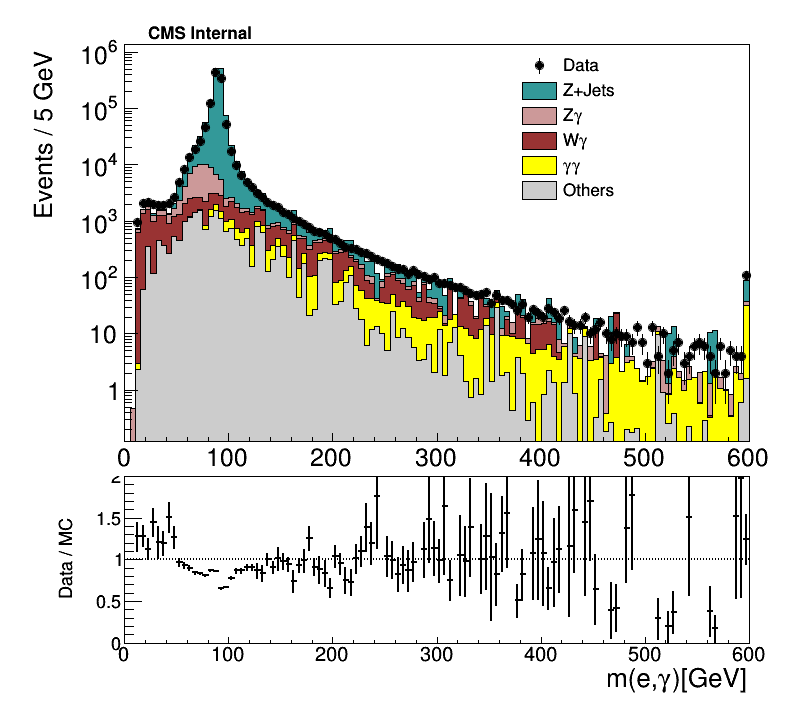

Info in <TCanvas::Print>: png file /tmp/tmpM36fwu.png has been created


In [25]:
samples.activate_sample(samples.stack_order_original_active)
samples.Draw("m_lep_ph","(ph_n>0 && abs(ph_eta[0])<1.4 && met_pt<25)",(120,0,600),
             {"xlabel":"m(e,#gamma)","logy":1,"unblind": unblind, "weight": weight, "doratio":1
             })

In [26]:
!bash /home/kakw/forjupyter/jupyterconvert.sh /home/kakw/public_html/ 2018_09_23_zmass_fitter.ipynb

**** Following environment variables are going to be unset.
       DBS_CLIENT_CONFIG
       DBSCMD_HOME
       PYTHON_VALGRIND_SUPP
[NbConvertApp] Converting notebook 2018_09_23_zmass_fitter.ipynb to slides
[NbConvertApp] Writing 467385 bytes to 2018_09_23_zmass_fitter.slides.html
[NbConvertApp] Converting notebook 2018_09_23_zmass_fitter.ipynb to html
[NbConvertApp] Writing 506672 bytes to 2018_09_23_zmass_fitter.html
Wed Sep 26 18:53:35 EDT 2018
